In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display

In [106]:
# imports the csv data 
car_data = pd.read_csv('merc.csv')

# Please select the vehicle features below and press "Calculate Price" for a predicted number

In [107]:
# setting up the widget for user inputs
year_selected = widgets.Dropdown(
    options=['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010',
       '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999',
       '1998', '1997', '1970'],
    value='2020',
    description='Year:',
    disabled=False,
)
year_selected

Dropdown(description='Year:', options=('2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',…

In [108]:
mileage_selected = widgets.Dropdown(
    options=['0', '5000', '10000', '15000', '20000', '25000', '30000', '40000', '50000', '60000', '70000', '80000', 
            '90000', '100000', '110000', '120000', '130000', '140000', '150000', '160000', '170000', '180000'],
    value='0',
    description='Mileage:',
    disabled=False,
)
mileage_selected

Dropdown(description='Mileage:', options=('0', '5000', '10000', '15000', '20000', '25000', '30000', '40000', '…

In [109]:
model_selected = widgets.Dropdown(
    options=['GLS Class', 'GLC Class', 'C Class', 'GLA Class', 'A Class',
       'E Class', 'B Class', 'GLE Class', 'CL Class', 'GLB Class',
       'V Class', 'CLA Class', 'X-CLASS', 'G Class', 'SL CLASS',
       'S Class', 'CLS Class', 'SLK', 'GL Class', '200', '220',
       'M Class', '180', 'R Class', 'CLC Class', '230', 'CLK'],
    value='GLS Class',
    description='Model: ',
    disabled=False,
)
model_selected

Dropdown(description='Model: ', options=('GLS Class', 'GLC Class', 'C Class', 'GLA Class', 'A Class', 'E Class…

In [110]:
transmission_selected = widgets.Dropdown(
    options=['Semi-Auto', 'Automatic', 'Manual', 'Other'],
    value='Semi-Auto',
    description='Transmission:',
    disabled=False,
)
transmission_selected

Dropdown(description='Transmission:', options=('Semi-Auto', 'Automatic', 'Manual', 'Other'), value='Semi-Auto'…

In [111]:
fuel_type_selected = widgets.Dropdown(
    options=['Diesel', 'Petrol', 'Hybrid', 'Other'],
    value='Diesel',
    description='Fuel Type:',
    disabled=False,
)
fuel_type_selected

Dropdown(description='Fuel Type:', options=('Diesel', 'Petrol', 'Hybrid', 'Other'), value='Diesel')

In [112]:
tax_selected = widgets.Dropdown(
    options=['580', '570', '565', '555', '540', '520', '330', '325', '315', '305', '300', '290', '280', 
             '270', '265', '260', '255', '250', '240', '235', '230', '220', '210', '205', '200', '195',
             '190', '185', '165', '160', '150', '145', '140', '135', '125', '115', '30', '20', '10',
             '0'],
    value='0',
    description='Tax:',
    disabled=False,
)
tax_selected

Dropdown(description='Tax:', index=39, options=('580', '570', '565', '555', '540', '520', '330', '325', '315',…

In [113]:
mpg_selected = widgets.Dropdown(
    options=['5','10','15', '20', '25', '30', '35', '40', '45', '50', '55', '60'],
    value='5',
    description='MPG:',
    disabled=False,
)
mpg_selected

Dropdown(description='MPG:', options=('5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60'), …

In [114]:
engine_size_selected = widgets.Dropdown(
    options=['6.2', '6', '5.5', '5.4', '5', '4.7', '4.3', '4', '3.7', '3.5', '3.2', '3', '2.9', 
             '2.7', '2.5', '2.3', '2.2', '2.1', '2', '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '0'],
    value='0',
    description='Engine Size:',
    disabled=False,
)
engine_size_selected

Dropdown(description='Engine Size:', index=25, options=('6.2', '6', '5.5', '5.4', '5', '4.7', '4.3', '4', '3.7…

In [115]:
output = widgets.Output()

# function that formats the number to dollars
def to_dollars(value):
    return "${:,.2f}".format(value)


# event handler calls the function that predicts the price 
def handle_click(_button):
    
    output.clear_output()
    price_predicted = get_price()
  
    # 
    with output:
         
        display(f"Price predicted for a {year_selected.value} {model_selected.value} "
                f"with {mileage_selected.value} miles, {mpg_selected.value} mpg, a tax of {tax_selected.value}, "
                f"an engine size of {engine_size_selected.value}, a fuel type of {fuel_type_selected.value}, "
                f"and a {transmission_selected.value} transmission is: ",to_dollars(price_predicted))

    return output
    

# calculate button
button = widgets.Button(
    description='Calculate Price!',
    disabled=False,
)

# event handler 
button.on_click(handle_click)

display(button, output)


Button(description='Calculate Price!', style=ButtonStyle())

Output()

# Descriptive Visualizations for Dataset 

## Dataset structure overview

In [116]:
# function that strips the whitespace from the right and left side of any strings 
def strip_spaces(data_frame):
    return data_frame.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

car_data = strip_spaces(car_data)

In [117]:
car_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [118]:

#there are no missing info 
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


## Price Distribution Per Model Description

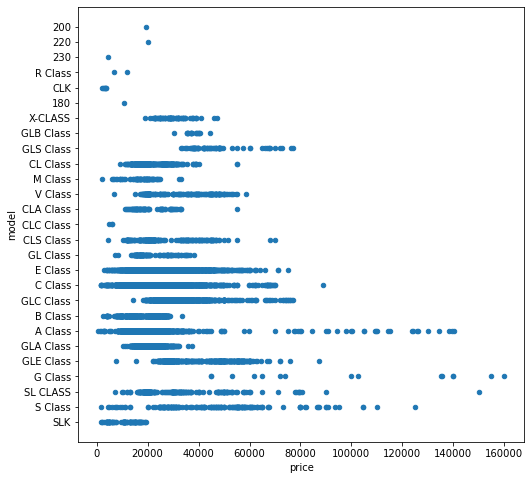

In [119]:
# viewing the relationship between the models and prices of the vehicles 
from matplotlib.pyplot import figure
car_data.plot(x="price", y="model", kind="scatter");

plt.rcParams["figure.figsize"] = (8,8)

## Mileage Based On Price Description

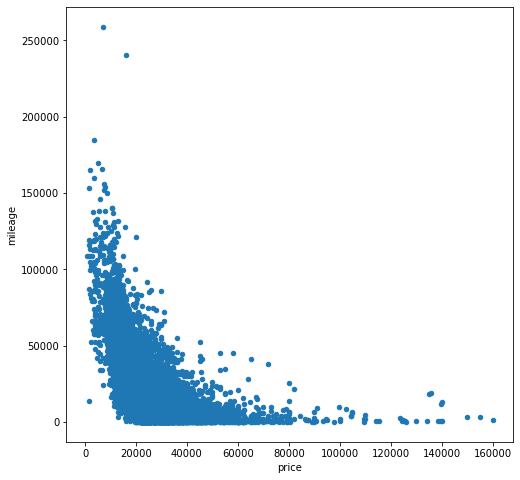

In [120]:
# viewing the relationship between the miles and the prices of the vehicles 
car_data["price"] = car_data["price"]
car_data.plot(x="price", y="mileage", kind='scatter');

## Different Model Distribution Description

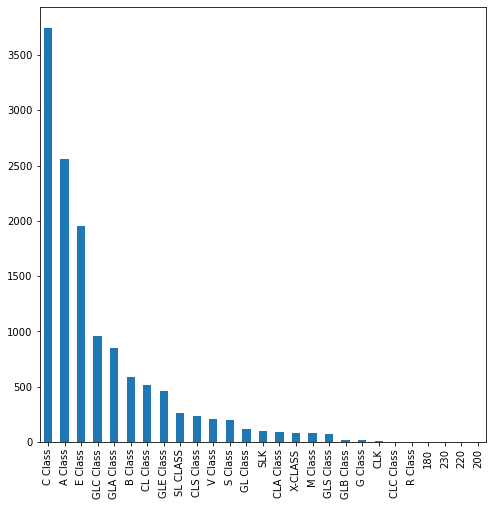

In [121]:
# viewing the distribution between the models 
car_data['model'].value_counts().plot(kind='bar');

## Year Of Make Distributuion 

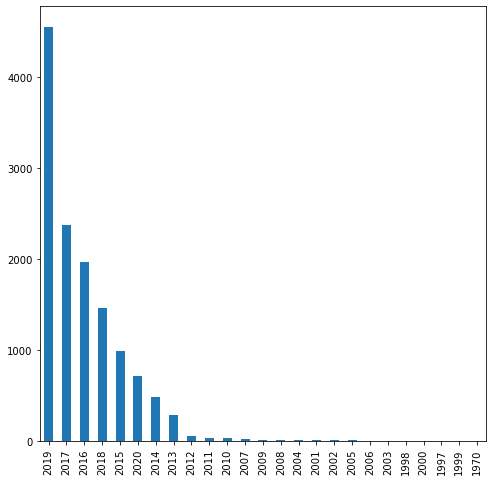

In [122]:
#viwing the distribution between the different years of the vehicles 
car_data['year'].value_counts().plot(kind='bar');

In [123]:
# Turning categorical data into numerical data using pandas get_dummies
df = pd.get_dummies(car_data)

In [124]:
# Here I am sperating the data into X and Y fields and turning it into an Array
Y = np.array(df['price'])
X = df.drop('price', axis = 1)
X = np.array(X)

In [125]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regregressor R2 Score

In [126]:
# splitting my data into training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y, 
                                                    test_size=0.2, random_state=42)

# finally, fitting the data into the model 
price_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
price_model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [127]:
# getting the R2 score of the model
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
y_pred = price_model.predict(X_test)
print(f"R2 score: {round(r2_score(Y_test, y_pred) * 100, 1)} %")

R2 score: 94.6 %


In [128]:
# function that uses the user values to predict a price 
def get_price() : 
    # puts the user selected values into a dictionary 
    d = {'model': [model_selected.value],'year': [year_selected.value],'transmission': [transmission_selected.value],
         'mileage': [mileage_selected.value], 'fuelType': [fuel_type_selected.value],'tax': [tax_selected.value],
         'mpg' : [mpg_selected.value], 'engineSize': [engine_size_selected.value]}
    # turns the dictionary into a dataframe 
    idf = pd.DataFrame(data=d)

    # turns all the categorical data into number variables 
    dummies_input = pd.get_dummies(idf)

    # combines the columns from the df and the dummies_input and puts NAN values in place
    # only the user selected values will be availble for the model 
    df_newdata = dummies_input.reindex(labels=df.columns,axis=1)

    # replaces all the NAN values with 0
    df_newdata.fillna(0, inplace=True)
    
    #drops the price feature 
    df_newdata.drop('price', axis=1, inplace=True)

    # converts the df_newdata into an array
    df_newdata_array = np.array(df_newdata)
    
    # predicts the price based on the user selected values 
    price_predicted = price_model.predict(df_newdata_array)
    return price_predicted[0]